### Find x, y and $Q^2$ from electrons

Formulas

$$Q^2 = -q^2$$

$$x = \frac{Q^2}{2 pq}$$

$$y = \frac{Q^2}{xs}$$

$s$ is a constant.

$$s = 4 * E_e * E_p$$


In [84]:
import numpy as np
import uproot as ur
import awkward as ak
import matplotlib.pyplot as plt
from math import log, cos


graphs = []

rang = np.logspace(0, 4, 1000)


# get data from file
s = 4 * 18 * 275
E = 18



for Eprime in (i*2 for i in range(100)):
    x = []
    Q2 = np.logspace(0, 4, 1000)
    for q in rang:
        xvar = (4 * q * E**2) / (s * (q - 2*E*Eprime + 4*E**2))
        y = q / (xvar * s)
        if y > 1:
            Q2 = Q2[Q2 != q]
        else:
            x.append(xvar)
        
    graphs.append([x, Q2])



### Graphing x and y vs. $Q^2$

100


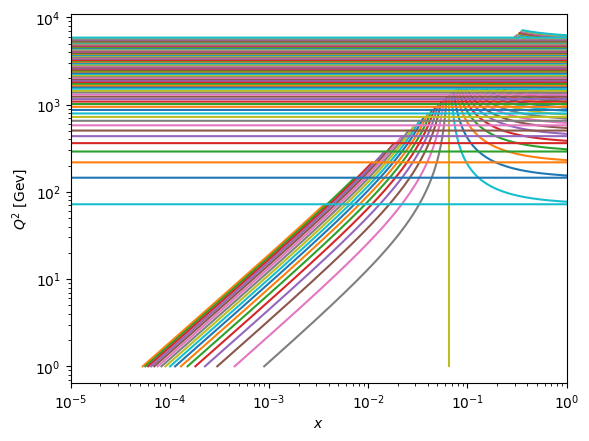

In [85]:


x_bins = np.logspace(-4, 0, 30) # specify exponents of 10
Q2_bins = np.logspace(-1, 3, 40) # specify exponents of 10
print(len(graphs))

for g in graphs:
    x, Q2 = g
    plt.plot(x, Q2)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$x$')
    plt.xlim((10**-5 , 1))
    plt.ylabel('$Q^2$ [Gev]')
